# Pyber Solution

### Summary

* Looking at the fare numbers in isolation, on average the Rural cities bring in a higher average fare per ride. This can be misleading as there are fewer drivers, fewer rural cities and the increase in fare amount is due to the distance driven per driver.
* The majority of revenue is obviously gained by concentrating drivers in the urban areas, even though their fares are slightly less on average, they are providing more rides, creating more revenue, and attracting more drivers to the base. 
* Keeping the Suburban markets as an attractive are to work is also necessary to keep overall revenues stable and growing. The Suburbs are offering about 1/3 the average fare for only 16% of the overall drivers making this a profitable portin of the business. As more competition is likely to hit the market, solidifying a base of business in the rural and suburban markets will help keep the Urban market and overall business healthy and profitable.

## Bubble Plot of Ride Sharing Data

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

random.seed(8)

# File to Load
load_city_data = "data/city_data.csv"
load_ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(load_city_data)
ride_df = pd.read_csv(load_ride_data)

In [2]:
# Combine the data into a single dataset
merge_on_city = pd.merge(ride_df, city_df, on="city", how="outer")

# Display the data table for preview
merge_on_city.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [3]:
#creating 3 data frames by type to perform calculations, will use the 9dfs below to spot 3 scatter plots
urban_df = merge_on_city[merge_on_city["type"]=="Urban"]
subur_df = merge_on_city[merge_on_city["type"]=="Suburban"]
rural_df = merge_on_city[merge_on_city["type"]=="Rural"]

In [4]:
#Calculating average fares for Urban cities
ur_fare_df = urban_df.groupby("city").mean()["fare"]

In [5]:
#Calculating amount of rides in Urban cities
ur_rides_df = urban_df.groupby("city").count()["ride_id"]

In [6]:
#Calculating the number of drivers in Urban cities
city_urban = city_df[city_df["type"]=="Urban"]
ur_driver_index = city_urban.set_index("city")
ur_drive_df = ur_driver_index.loc[ :, "driver_count"]

In [7]:
#Calculating average fares for Suburban cities
sub_fare_df = subur_df.groupby("city").mean()["fare"]

In [8]:
#Calculating amount of rides in Suburban cities
sub_rides_df = subur_df.groupby("city").count()["ride_id"]

In [9]:
#Calculating the number of drivers in Suburban cities
city_subur = city_df[city_df["type"]=="Suburban"]
sub_driver_index = city_subur.set_index("city")
sub_drive_df = sub_driver_index.loc[ :, "driver_count"]

In [10]:
#Calculating average fares for Rural cities
rural_fare_df = rural_df.groupby("city").mean()["fare"]

In [11]:
#Calculating amount of rides in Rural cities
rural_rides_df = rural_df.groupby("city").count()["ride_id"]

In [12]:
#Calculating the number of drivers in Rural cities
city_rural = city_df[city_df["type"]=="Rural"]
rural_driver_index = city_rural.set_index("city")
rural_drive_df = rural_driver_index.loc[ :, "driver_count"]

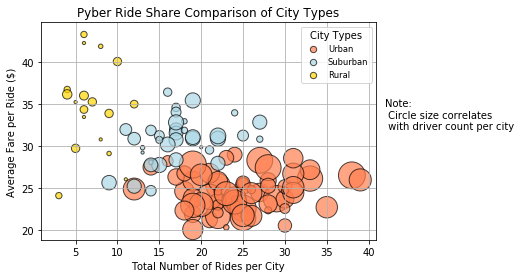

In [13]:
#Plot data points for bubble chart
plt.scatter(ur_rides_df, ur_fare_df, s=ur_drive_df*10, c="coral", alpha=0.7, 
            edgecolors="black",label="Urban")
plt.scatter(sub_rides_df, sub_fare_df, s=sub_drive_df*10, c="lightblue", alpha=0.7,
            edgecolors="black", label="Suburban")
plt.scatter(rural_rides_df, rural_fare_df, s=rural_drive_df*10, c="gold", alpha=0.7,
            edgecolors="black", label="Rural")

plt.title("Pyber Ride Share Comparison of City Types")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare per Ride ($)")

#plt.legend(title="City Type", markerscale=.7, legend)
lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1,
                 loc="best", title="City Types",
                 labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
plt.text(42,32,'Note:\n Circle size correlates \n with driver count per city')
plt.grid()

plt.savefig("Images/PyberBubble.png", bbox_inches='tight')

plt.show()

## Total Fares by City Type

In [14]:
#Test on calculating Total fares for type of city -> this returns the per city result
#need the total for Rural not per city
type_total_fare_city = merge_on_city.groupby(["type", "city"]).sum()["fare"]

In [15]:
type_ride_per_city = merge_on_city.groupby(["type", "city"]).count()["ride_id"]


In [16]:
type_drivers_per_city = city_df.groupby(["type", "city"]).sum()["driver_count"]


In [17]:
dict_try = {"Total City Fare": type_total_fare_city, 
            "City Rides": type_ride_per_city,
            "City Drivers": type_drivers_per_city}
type_by_city_info = pd.DataFrame(dict_try)

In [18]:
total_py_fare = type_by_city_info.sum()["Total City Fare"]

In [19]:
#Calculating the Pie Chart - % of Total Fares by City Type
# % of Rural fares
total_fare_by_rural = type_by_city_info.loc[["Rural"], ["Total City Fare"]]
rural_fare_total = (total_fare_by_rural.sum()/total_py_fare)*100

In [20]:
# % of Suburban fares
total_fare_by_subu = type_by_city_info.loc[["Suburban"], ["Total City Fare"]]
subu_fare_total = (total_fare_by_subu.sum()/total_py_fare)*100

In [21]:
# % of Urban fares
total_fare_by_urb = type_by_city_info.loc[["Urban"], ["Total City Fare"]]
urb_fare_total = (total_fare_by_urb.sum()/total_py_fare)*100

In [22]:
# Labels for the sections of our pie chart
city_types = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
percentage = [rural_fare_total, subu_fare_total, urb_fare_total]

# The colors of each section of the pie chart
pybar_colors = ["gold", "skyblue", "lightcoral"]

# Tells matplotlib to seperate the "Human" section from the others
explode2 = (0, 0, 0.1)

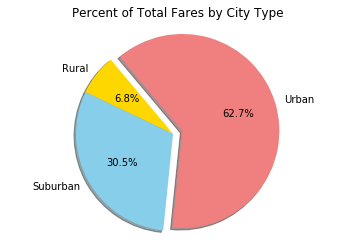

In [23]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(percentage, explode=explode2, labels=city_types, colors=pybar_colors,
        autopct="%1.1f%%", shadow=True, startangle=130)

# Tells matplotlib that we want a pie chart with equal axes
plt.title("Percent of Total Fares by City Type")
plt.axis("equal")
plt.savefig("Images/Fares by City Type.png")

plt.show()

## Total Rides by City Type

In [24]:
#Start Pie chart calculations for % Total Rides by City Type
#total ride amount overall
total_py_ride = type_by_city_info.sum()["City Rides"]

In [25]:
#Calculating the Pie Chart - % of Total Fares by City Type
total_rides_by_rural = type_by_city_info.loc[["Rural"], ["City Rides"]]
# % of Rural fares
rural_rides_total = (total_rides_by_rural.sum()/total_py_ride)*100

In [26]:
#Calculating the Pie Chart - % of Total Fares by City Type
total_rides_by_subu = type_by_city_info.loc[["Suburban"], ["City Rides"]]
# % of Rural fares
subu_rides_total = (total_rides_by_subu.sum()/total_py_ride)*100

In [27]:
#Calculating the Pie Chart - % of Total Fares by City Type
total_rides_by_urban = type_by_city_info.loc[["Urban"], ["City Rides"]]
# % of Rural fares
urban_rides_total = (total_rides_by_urban.sum()/total_py_ride)*100

In [28]:
# Labels for the sections of our pie chart - % Total Rides by City Type
city_types = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
percentage = [rural_rides_total, subu_rides_total, urban_rides_total]

# The colors of each section of the pie chart
pybar_colors = ["gold", "skyblue", "lightcoral"]

# Tells matplotlib to seperate the "Human" section from the others
explode2 = (0, 0, 0.1)

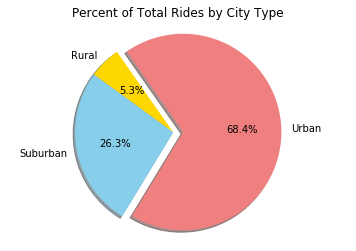

In [29]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(percentage, explode=explode2, labels=city_types, colors=pybar_colors,
        autopct="%1.1f%%", shadow=True, startangle=125)

# Tells matplotlib that we want a pie chart with equal axes
plt.title("Percent of Total Rides by City Type")
plt.axis("equal")
plt.savefig("Images/Total Ride by City Type.png")

plt.show()

## Total Drivers by City Type

In [30]:
#total drivers amount overall
total_py_drive = city_df["driver_count"].sum()

In [31]:
# Total drivers Rural
city_rural = city_df[city_df["type"]=="Rural"]
city_counts = city_rural["driver_count"].sum()
# % of Rural drivers
rural_drivers_perc = (city_counts/total_py_drive)*100

In [32]:
#Total drives Suburban
city_subu = city_df[city_df["type"]=="Suburban"]
city_counts2 = city_subu["driver_count"].sum()
# % of Suburban drivers
subu_drivers_perc = (city_counts2/total_py_drive)*100

In [33]:
#Calculating the Pie Chart - % of Total Drivers by City Type
city_urban = city_df[city_df["type"]=="Urban"]
city_count3 = city_urban["driver_count"].sum()
# % of Urban Drivers
urban_drivers_perc = (city_count3/total_py_drive)*100

In [34]:
# Labels for the sections of our pie chart - % Total Rides by City Type
city_types = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
percentage = [rural_drivers_perc, subu_drivers_perc, urban_drivers_perc]

# The colors of each section of the pie chart
pybar_colors = ["gold", "skyblue", "lightcoral"]

# Tells matplotlib to seperate the "Human" section from the others
explode2 = (0, 0, 0.1)

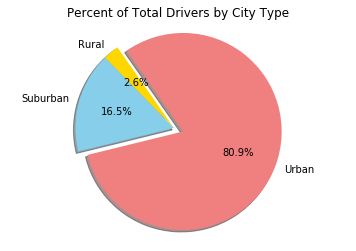

In [35]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(percentage, explode=explode2, labels=city_types, colors=pybar_colors,
        autopct="%1.1f%%", shadow=True, startangle=125)

# Tells matplotlib that we want a pie chart with equal axes
plt.title("Percent of Total Drivers by City Type")
plt.axis("equal")
plt.savefig("Images/Drivers by City Type.png")

plt.show()